In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [54]:
dataset = pd.read_csv(r'C:\Users\HP\Desktop\SMART_HEALTH\Datasets\Liveres\IndianLiverPatientDataset.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [55]:
dataset['gender'] = dataset['gender'].apply(lambda x:1 if x == 'Male' else 0)

In [56]:
dataset.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [57]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [58]:
dataset['alkphos']=imp.fit_transform(dataset[['alkphos']])

In [59]:
dataset.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [60]:
dataset.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


([<matplotlib.axis.YTick at 0x1dd598583d0>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'gender'),
  Text(0, 2, 'tot_bilirubin'),
  Text(0, 3, 'direct_bilirubin'),
  Text(0, 4, 'tot_proteins'),
  Text(0, 5, 'albumin'),
  Text(0, 6, 'ag_ratio'),
  Text(0, 7, 'sgpt'),
  Text(0, 8, 'sgot'),
  Text(0, 9, 'alkphos'),
  Text(0, 10, 'is_patient')])

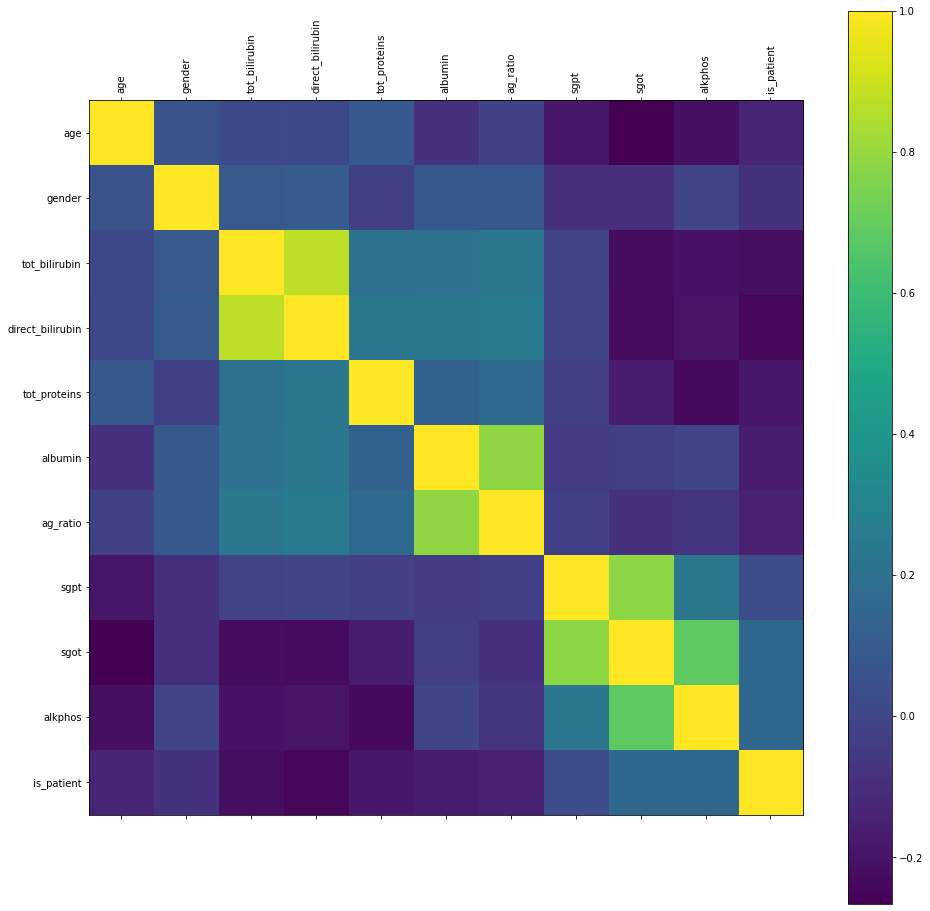

In [61]:
rcParams['figure.figsize'] = 16, 16
plt.matshow(dataset.corr())
plt.colorbar()
plt.xticks(np.arange(dataset.shape[1]), dataset.columns, rotation = 'vertical')
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'tot_bilirubin'}>],
       [<AxesSubplot:title={'center':'direct_bilirubin'}>,
        <AxesSubplot:title={'center':'tot_proteins'}>,
        <AxesSubplot:title={'center':'albumin'}>],
       [<AxesSubplot:title={'center':'ag_ratio'}>,
        <AxesSubplot:title={'center':'sgpt'}>,
        <AxesSubplot:title={'center':'sgot'}>],
       [<AxesSubplot:title={'center':'alkphos'}>,
        <AxesSubplot:title={'center':'is_patient'}>, <AxesSubplot:>]],
      dtype=object)

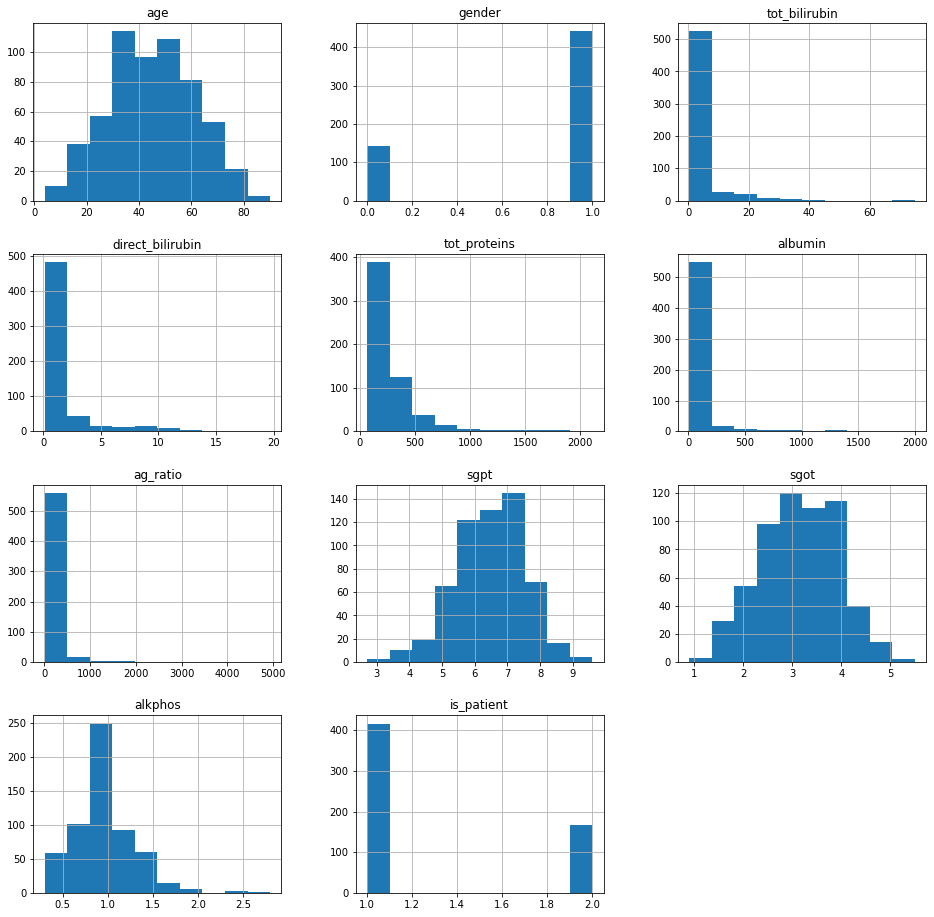

In [62]:
dataset.hist()

In [63]:
dataset.head(4)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1


In [65]:
StdSclr = StandardScaler()
columns = ['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos']
dataset[columns] = StdSclr.fit_transform(dataset[columns])

In [140]:
y = dataset['is_patient']
x = dataset.drop(['is_patient','ag_ratio'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [141]:
#LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [142]:
print('Accuracy = {}'.format(round(100*LR_model.score(x_test, y_test), 2)))

Accuracy = 78.41


In [143]:
#K-Neighbours
knn_score_lst = []
for i in range(4, 36):    
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_score_lst.append(round(100*knn_model.score(x_test, y_test),2))

In [144]:
print(knn_score_lst)

[71.59, 62.5, 68.18, 64.77, 67.05, 64.77, 65.91, 64.77, 68.18, 68.18, 71.59, 67.05, 69.32, 68.18, 69.32, 68.18, 73.86, 69.32, 73.86, 72.73, 76.14, 75.0, 75.0, 73.86, 75.0, 71.59, 73.86, 78.41, 79.55, 78.41, 78.41, 77.27]


([<matplotlib.axis.XTick at 0x1dd5d59b580>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

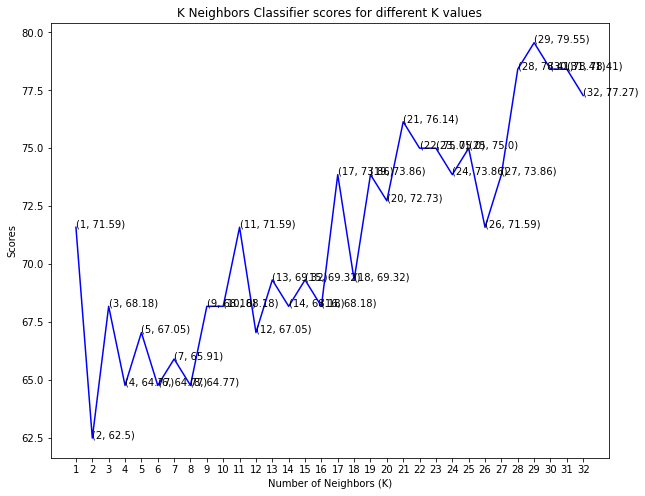

In [145]:
plt.plot([ i for i in range(1, 33)], knn_score_lst, color = 'blue')
for i in range(1, 33):
    plt.text( i, knn_score_lst[i-1], (i, knn_score_lst[i-1]))
plt.title('K Neighbors Classifier scores for different K values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.xticks([i for i in range( 1, 33)])

In [146]:
#decision tree

decision_tree_score_lst = []
for i in range(1, len(x.columns) + 1):
    dt_model = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_model.fit(x_train, y_train)
    decision_tree_score_lst.append(round(100*dt_model.score(x_test, y_test), 2))

([<matplotlib.axis.XTick at 0x1dd5da230a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

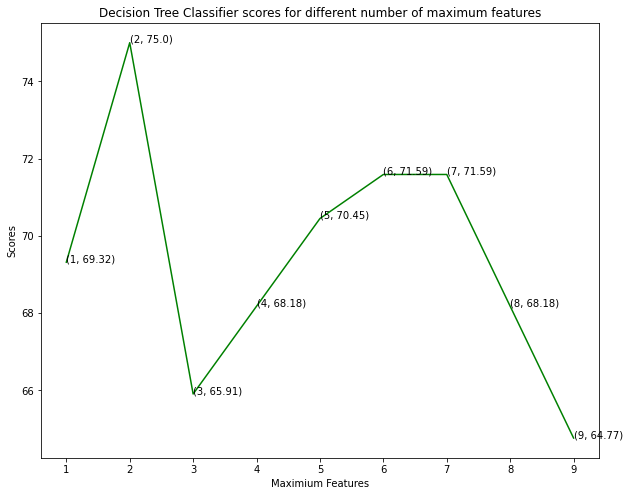

In [147]:
plt.plot([i for i in range(1, len(x.columns) + 1)], decision_tree_score_lst, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text( i, decision_tree_score_lst[i-1], ( i, decision_tree_score_lst[i-1]))
plt.title("Decision Tree Classifier scores for different number of maximum features")
plt.xlabel("Maximium Features")
plt.ylabel("Scores")
plt.xticks([i for i in range(1, len(x.columns) + 1)])

In [148]:
#svm
svc_score_lst = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    svc_model = SVC(kernel = i)
    svc_model.fit(x_train, y_train)
    svc_score_lst.append(svc_model.score(x_test, y_test))

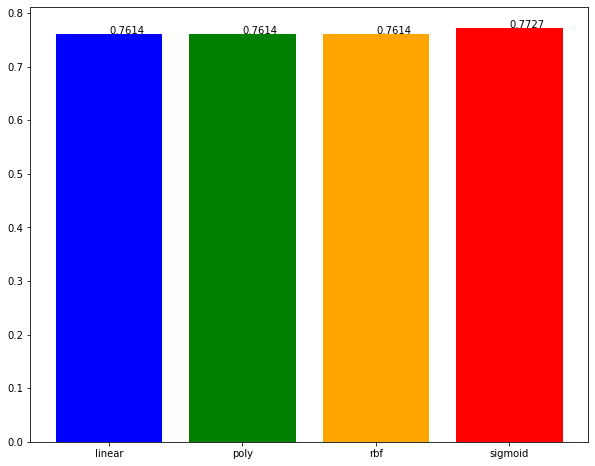

In [149]:
plt.bar(kernels, svc_score_lst, color = ['blue', 'green', 'orange', 'red'])
for i in range(len(kernels)):
    plt.text(i, svc_score_lst[i], round(svc_score_lst[i], 4))

In [160]:
y = dataset['is_patient']
x = dataset.drop(['is_patient','ag_ratio'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.29, random_state = 1)

In [161]:
#Naive bayes

Nb_model = GaussianNB()

Nb_model.fit(x_train, y_train)

Nb_model.score(x_test, y_test)

0.6176470588235294

# Accuracy Comparision

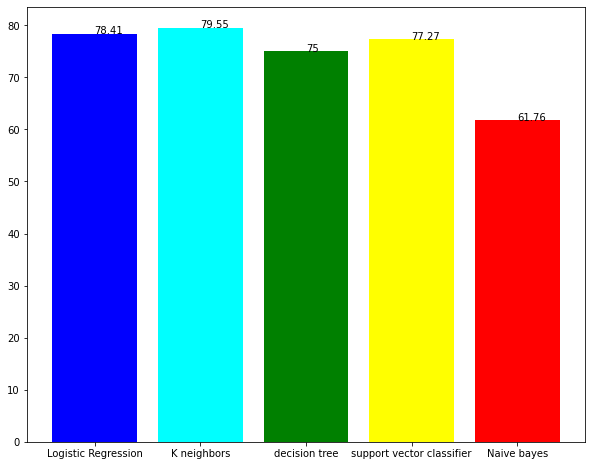

In [162]:
rcParams['figure.figsize'] = 10,8
lst_x = ['Logistic Regression', 'K neighbors', 'decision tree', 'support vector classifier', 'Naive bayes']
lst_y = [ 78.41, 79.55, 75, 77.27, 61.76 ]
plt.bar(lst_x, lst_y, color = ['blue', 'cyan', 'green', 'yellow', 'red'])
for i in range(len(lst_y)):
    plt.text(i, lst_y[i], lst_y[i])

# Liveries

Clearly KNN gives best result.